### Задание 1

 - Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?

In [19]:
import pandas as pd

# Чтение данные из файла train.csv
df = pd.read_csv('train.csv')

# Группировка данных по подгруппам товаров и подсчёт количества продаж
sales_on_subcategory = df['Sub-Category'].value_counts()
print(sales_on_subcategory.nlargest(24))

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64


- Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

In [17]:
from dateutil.relativedelta import relativedelta
from datetime import datetime
import pandas as pd

# Чтение данных из файла train.csv
df = pd.read_csv('train.csv')

# Преобразование даты заказа в datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Отсечь данные старше чем два года, подсчёт количества продаж
last_two_years = df[df['Order Date'] >= pd.to_datetime(df['Order Date'].max() - relativedelta(years=1))]
assert last_two_years['Order Date'].min() > df['Order Date'].min()
sales_on_subcategory_last_two_years = last_two_years['Sub-Category'].value_counts()

print(sales_on_subcategory_last_two_years.nlargest(4))

Sub-Category
Binders        496
Paper          454
Furnishings    310
Phones         291
Name: count, dtype: int64


- Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?

In [14]:
from dateutil.relativedelta import relativedelta
from datetime import datetime
import pandas as pd

# Чтение данных из файла train.csv
df = pd.read_csv('train.csv')

# Преобразование даты заказа в datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Отсечь данные старше чем два года, подсчёт количества продаж
last_two_years = df[df['Order Date'] >= pd.to_datetime(df['Order Date'].max() - relativedelta(years=2))]
assert last_two_years['Order Date'].min() > df['Order Date'].min()
sales_on_subcategory_last_two_years = last_two_years['Sub-Category'].value_counts()

print(sales_on_subcategory_last_two_years.nlargest(4))

Sub-Category
Binders        907
Paper          810
Furnishings    558
Phones         511
Name: count, dtype: int64


#### На основе результатов можно сделать следующие выводы:
- Подгруппы товаров Binders, Paper, Furnishings и Phones являются лидерами продаж за все время, последние два года и последний год.
- Binders являются абсолютными лидерами продаж во всех трех исследуемых периодах.
- Динамика продаж крайне стабильная

### Задание 2
 Построить boxplot («Ящик с усами») на основе продаж (Sales). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).
 Можно использовать правило трех сигм. Однако любые другие решения приветствуются.


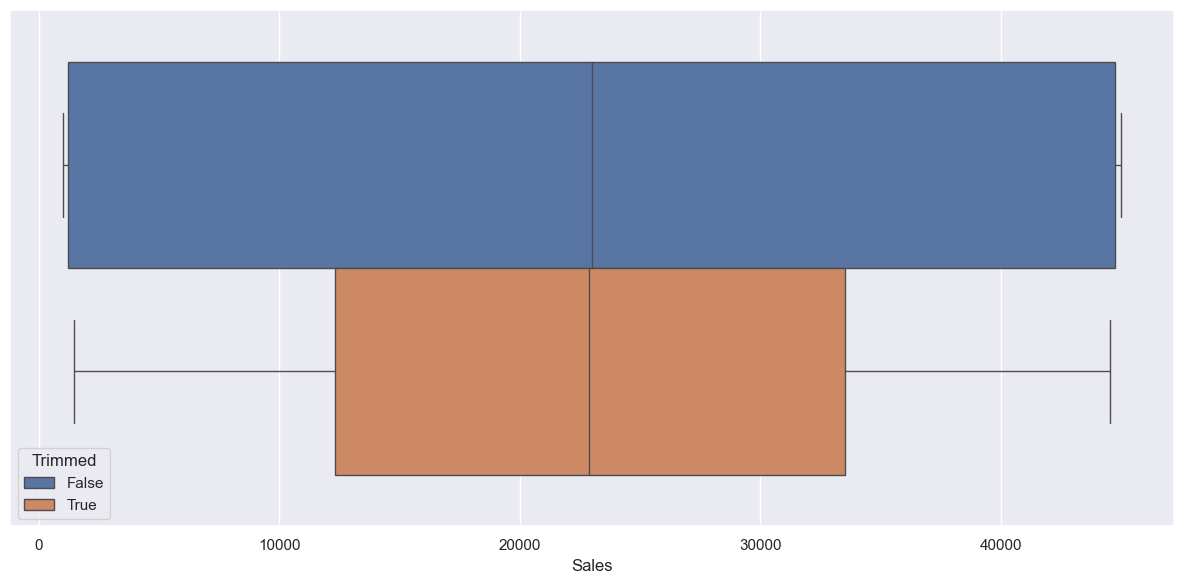

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Чтение данных из файла train.csv
df = pd.read_csv('train.csv')
df['Sales'] = df['Sales'].str.replace(",", ".").astype(float)

# Метод процентной обрезки, чтобы удалить аномалии
q_low = df["Sales"].quantile(0.01)  # Нижний
q_high = df["Sales"].quantile(0.99)  # Верхний
assert q_low < q_high

df['Trimmed'] = df['Sales'].between(q_low, q_high)

# НАдо
sns.set_theme(style="darkgrid", palette="deep")

# Создаём фигуру
plt.figure(figsize=(12, 6))

# Бокс плот
sns.boxplot(data=df, x='Sales', hue='Trimmed')

# Показываем график
plt.tight_layout()
plt.show()
